# The Financial Instrument
This Class analyses the financial instruments eg stocks etc. Any stock
can be selected and can be analysed using the functions provided by the
class or using pandas and numpy libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
class FinancialInstrument():
    """
    A Class to analyze any Financial Instrument e.g. stock, etc.
    Uses yfinance to download the data for a stock, pandas and numpy to do arithmetic operations
    on it and matplotlib to visualize the stock data
    :param ticker: The ticker of the stock whose price shall be downloaded. e.g. for Infosys India it would be "INFY.NS" where INFY is the name of the stock and NS is for NSE stock market.
    :param start: The start date from which the stock prices shall be downloaded in format "YYYY-MM-DD"
    :param end: The end date till which the stock prices shall be downloaded in format "YYYY-MM-DD"
    """
    def __init__(self,ticker: str,start: str,end: str,interval: str):
        """

        :param ticker: The ticker of the stock whose price shall be downloaded. e.g. for Infosys India it would be "INFY.NS" where INFY is the name of the stock and NS is for NSE stock market.
        :param start: The start date from which the stock prices shall be downloaded in format "YYYY-MM-DD"
        :param end: The end date till which the stock prices shall be downloaded in format "YYYY-MM-DD"

        """
        self._ticker = ticker
        self.start = start
        self.end = end
        self.interval = interval
        self.get_data()
        self.log_returns()

    def __repr__(self):
        return f"FinancialInstrument(ticker={self._ticker}, start={self.start},end={self.end})"

    def get_data(self):
        """
        Downloads data from yfinance
        :return: A dataframe with price and log_returns columns of the ticker the class is initialized with.
        """
        self.data = yf.download(self._ticker,self.start,self.end,interval=self.interval).Close.to_frame()
        self.data.rename(columns={'Close': 'price'},inplace = True)

    def log_returns(self):
        """
        Adds a column log_returns to self.data which contains the daily log_returns of the
        stock price.
        """
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))

    def plot_prices(self):
        """
        Plots the line chart of the prices of stock
        """
        self.data.price.plot(figsize=(12,8))
        plt.title(f"Price Chart: {self._ticker}", fontsize=15)

    def plot_returns(self,kind='ts'):
        """
        Plots the returns for a given stock
        :param kind: 'ts' for line chart else 'hist' for histogram
        """

        if kind=='ts':
            self.data.log_returns.plot(figsize=(12,8))
            plt.title(f"Returns: {self._ticker}",fontsize=15)
        elif kind=='hist':
            self.data.log_returns.hist(figsize=(12,8),bins=int(np.sqrt(len(self.data))))
            plt.title(f"Frequency of Returns: {self._ticker}",fontsize=15)

    def set_ticker(self, ticker=None):
        """
        Changes the default ticker to new one
        :param ticker: Ticker of the stock to be changed
        """
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()

        else:
            print("Give the name of the ticker to change to.")

    def mean_returns(self,freq=None):
        """
        Calculates the mean returns of the returns
        :param freq: the frequency for stock price if it is None then the mean of all prices is calculated.
        :return: returns the mean of log returns of the stock price
        """
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_price = np.log(resampled_price / resampled_price.shift(1))
            return resampled_price.mean()

    def std_returns(self,freq=None):
        """
        Calculates the standard deviation / risk percentage of stock prices
        :param freq: the frequency for a stock price if it is None then the standard deviation of all prices is calculated
        else it is calculated for a stipulated freq value
        :return: returns the standard deviation of the stock price
        """
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_price = np.log(resampled_price / resampled_price.shift(1))
            return resampled_price.std()


    def annualized_returns(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk_return = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print(f"Returns : {mean_return} | Risk : {risk_return}")




In [3]:
infy_stock = FinancialInstrument(ticker='INFY.NS',start='2011-01-01',end=pd.Timestamp.today())

[*********************100%***********************]  1 of 1 completed


In [4]:
infy_stock

FinancialInstrument(ticker=INFY.NS, start=2011-01-01,end=2023-02-03 01:26:01.611901)

In [5]:
infy_stock.data

,price,log_returns
Date,,
2011-01-03 00:00:00+05:30,432.293762,NaN
2011-01-04 00:00:00+05:30,435.181244,0.006657
2011-01-05 00:00:00+05:30,432.450012,-0.006296
2011-01-06 00:00:00+05:30,434.768738,0.005348
2011-01-07 00:00:00+05:30,421.343750,-0.031365
...,...,...
2023-01-27 00:00:00+05:30,1519.150024,-0.015578
2023-01-30 00:00:00+05:30,1538.800049,0.012852
2023-01-31 00:00:00+05:30,1533.750000,-0.003287


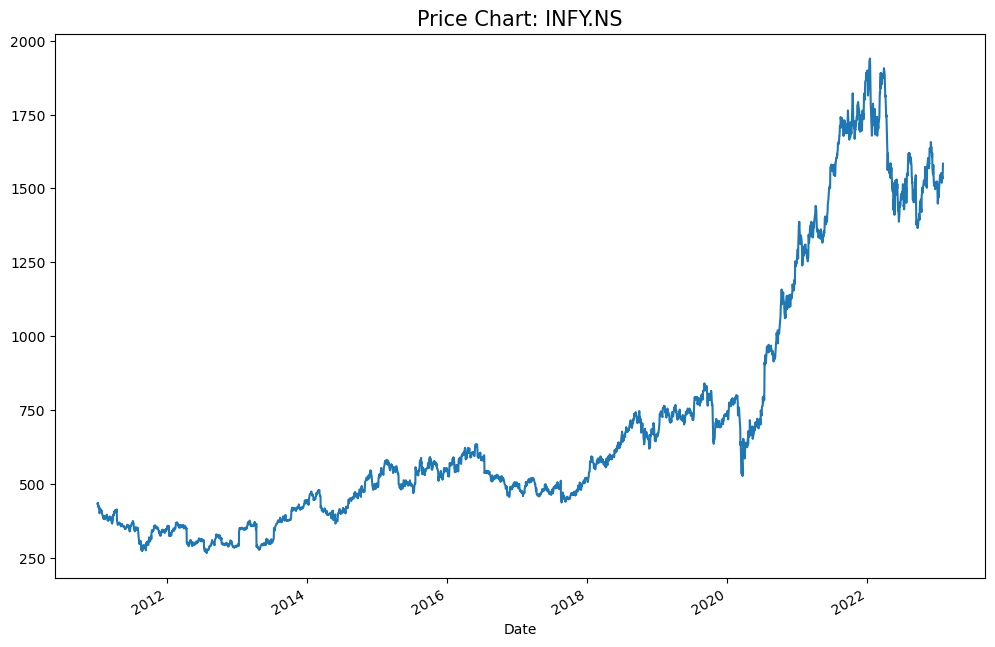

In [6]:
infy_stock.plot_prices()

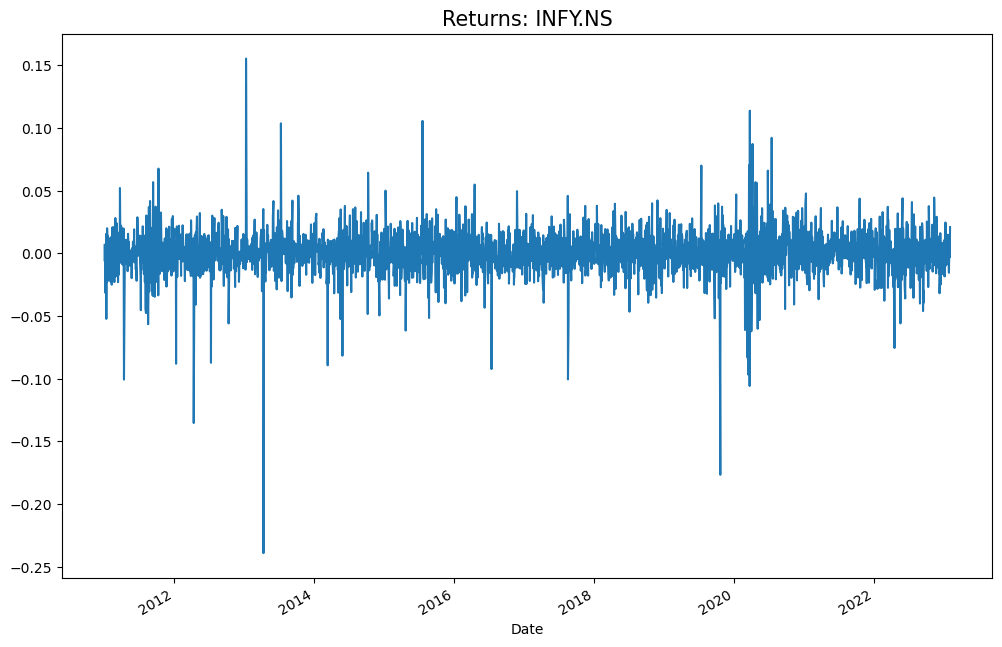

In [7]:
infy_stock.plot_returns(kind='ts')

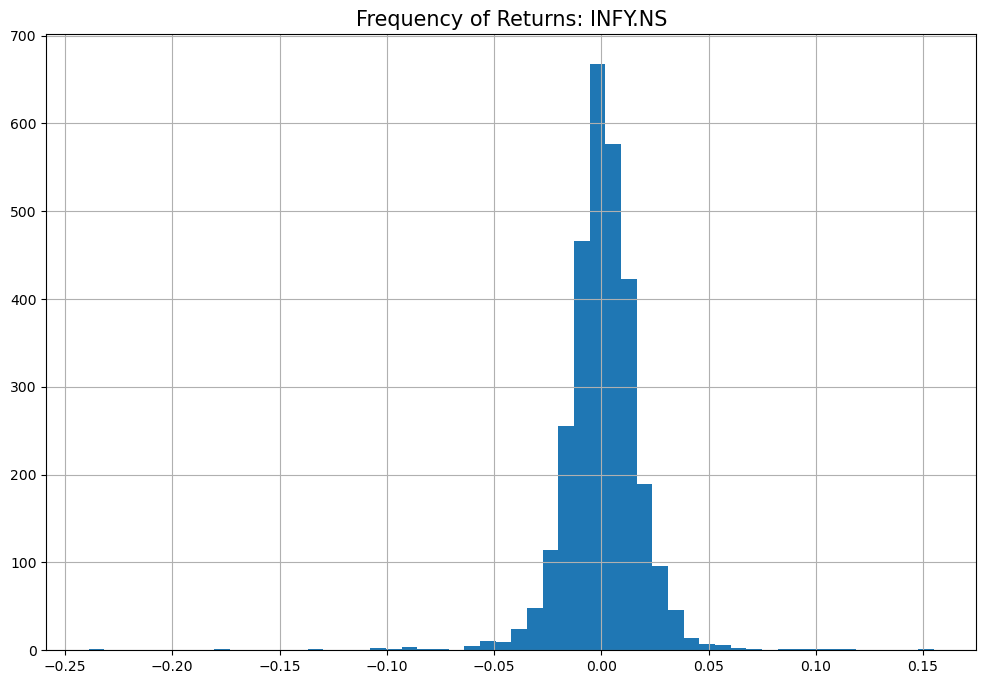

In [8]:
infy_stock.plot_returns(kind='hist')

In [9]:
infy_stock.mean_returns()

0.0004355737569208591

In [10]:
infy_stock.std_returns()

0.017894289408894423

In [11]:
infy_stock.annualized_returns()

Returns : 0.11 | Risk : 0.284


In [12]:
infy_stock.data.log_returns.sum()

1.298445369381081

In [13]:
np.exp(infy_stock.data.log_returns.sum())

3.6635966984911423

In [14]:
price = infy_stock.data.price
price[-1] / price[0]

3.6635966984911548

In [15]:
infy_stock.data.log_returns[-252:].cumsum().apply(np.exp)

Date
2022-01-31 00:00:00+05:30    1.029652
2022-02-01 00:00:00+05:30    1.050913
2022-02-02 00:00:00+05:30    1.059839
2022-02-03 00:00:00+05:30    1.031046
2022-02-04 00:00:00+05:30    1.032558
                               ...   
2023-01-27 00:00:00+05:30    0.900931
2023-01-30 00:00:00+05:30    0.912585
2023-01-31 00:00:00+05:30    0.909590
2023-02-01 00:00:00+05:30    0.919879
2023-02-02 00:00:00+05:30    0.939242
Name: log_returns, Length: 252, dtype: float64